In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [27]:
print(tf.__version__)

2.2.0


In [28]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-05 06:23:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  24.4MB/s    in 15s     

2020-07-05 06:23:27 (20.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [29]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [30]:
pip install split_folders

In [31]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images',output="/tmp/rockpaperscissors/data",seed = 1337, ratio=(.8, .2,))
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
datagen = ImageDataGenerator(
rescale=1./255,
validation_split=0.2
)

Copying files: 2188 files [00:01, 2051.98 files/s]


In [32]:
os.listdir('/tmp/rockpaperscissors/data/train')

['rock', 'scissors', 'paper']

In [33]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [34]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
                    
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [35]:
train_generator = train_datagen.flow_from_directory( train_dir, # Train directory 
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )
validation_generator = test_datagen.flow_from_directory( validation_dir, # Validation Directory
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        seed=42,
                                                        class_mode='categorical',
                                                        )

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
    

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.0617 - accuracy: 0.9787 - val_loss: 0.0955 - val_accuracy: 0.9688
Epoch 2/20
25/25 - 6s - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.2995 - val_accuracy: 0.9375
Epoch 3/20
25/25 - 6s - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.1891 - val_accuracy: 0.9500
Epoch 4/20
25/25 - 6s - loss: 0.0605 - accuracy: 0.9835 - val_loss: 0.0861 - val_accuracy: 0.9937
Epoch 5/20
25/25 - 6s - loss: 0.0508 - accuracy: 0.9911 - val_loss: 0.0841 - val_accuracy: 0.9750
Epoch 6/20
25/25 - 6s - loss: 0.0379 - accuracy: 0.9861 - val_loss: 0.1169 - val_accuracy: 0.9688
Epoch 7/20
25/25 - 6s - loss: 0.0641 - accuracy: 0.9848 - val_loss: 0.1860 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 6s - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.1555 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 6s - loss: 0.0372 - accuracy: 0.9873 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 6s - loss: 0.0288 - accuracy: 0.9887 - val_loss: 0.0792 - val_accuracy: 0.9812
Epoch 11/20
25/25 -

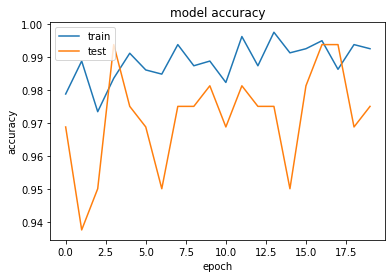

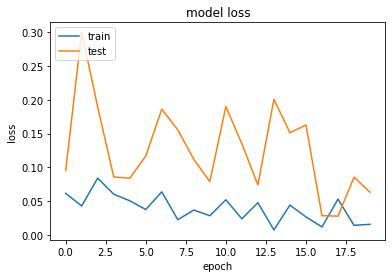

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
[[0. 1. 0.]]
00nKV8oHuTGi20gq.png
rock


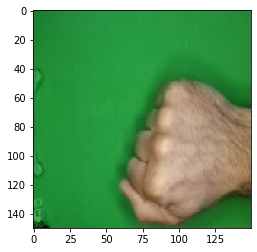

In [53]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)
  print(classes)
  print(fn)
  if hasil == 0:
    print('paper')
  elif hasil == 1:
    print('rock')
  else:
    print('scissors')